In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,10)})

In [2]:
df=pd.read_csv('ACME-HappinessSurvey2020.csv')

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Y     126 non-null int64
X1    126 non-null int64
X2    126 non-null int64
X3    126 non-null int64
X4    126 non-null int64
X5    126 non-null int64
X6    126 non-null int64
dtypes: int64(7)
memory usage: 7.0 KB


## Data Description:

    Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
    X1 = my order was delivered on time
    X2 = contents of my order was as I expected
    X3 = I ordered everything I wanted to order
    X4 = I paid a good price for my order 
    X5 = I am satisfied with my courier
    X6 = the app makes ordering easy for me 

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer. 


## The dataset is clean and we can proceed to EDA

In [5]:
#Rename the columns
column_names=['satisfaction','order_time','order_quality','inventory_quality','price','courier_quality','app_quality']
df.columns=column_names

In [6]:
print(round((df['satisfaction'].value_counts()/len(df)*100),1),'%')

1    54.8
0    45.2
Name: satisfaction, dtype: float64 %


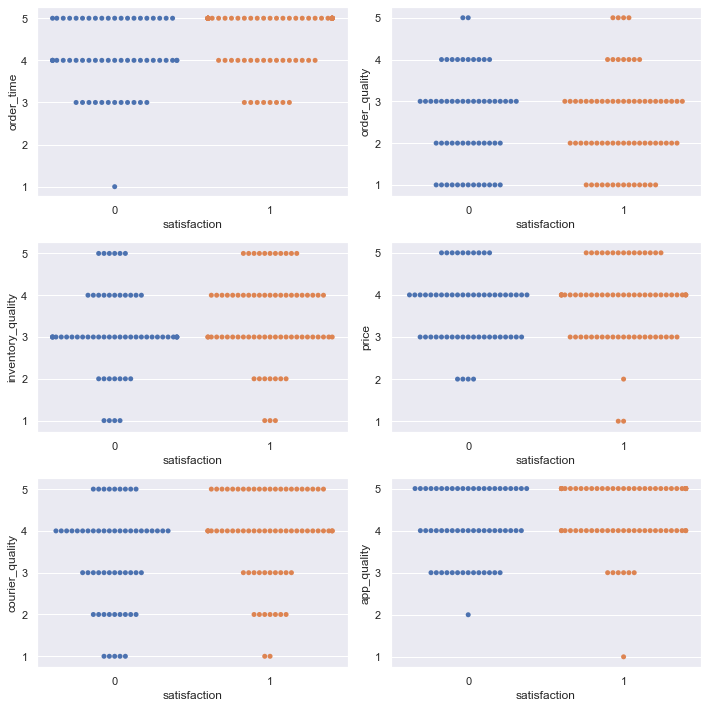

In [7]:
#Satisfaction Parameters
X=df[[i for i in list(df.columns) if i != 'satisfication']]

fig, axs = plt.subplots(3, 2)

for column,i in zip(X.columns,range(len(X.columns))):
    if column == 'satisfaction':
        pass
    else:
            plt.subplot(3,2,i)
            sns.swarmplot(y=column, x='satisfaction',data=df, orient="v")
            plt.tight_layout()
            

In [8]:
#Numeric Data 
df[df['satisfaction'] == 0].describe()

,satisfaction,order_time,order_quality,inventory_quality,price,courier_quality,app_quality
count,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
std,0.0,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
min,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
25%,0.0,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,0.0,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,0.0,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
#Numeric Data 
df[df['satisfaction'] == 1].describe()

,satisfaction,order_time,order_quality,inventory_quality,price,courier_quality,app_quality
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812
std,0.0,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908
min,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.0,5.000000,2.000000,3.000000,4.000000,4.000000,5.000000
75%,1.0,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000
max,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##  Analysis
Order time has the highest mean overall with one rating lower than 3, which could was one of the worst delivery experiences combining other factors. It looks the courier was late and brought wrong order. The app seems to be pretty solid overall minus one bad experience oddly combined with a satisifactory review. Pricing seems to be pretty fair. Inventory quality seems to the most glaring factor facing this company. The mean is pretty even on both happy and unhappy reviews. Order quality is also unappealing even in happy satifaction conditions. Going forward this company should really look at inventory quality and order quality to improve their customer satisfaction. With more data, I would compare the data with t-tests to see if there any significane between the means. 

In [10]:
df.corr()

,satisfaction,order_time,order_quality,inventory_quality,price,courier_quality,app_quality
satisfaction,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
order_time,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
order_quality,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
inventory_quality,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
price,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
courier_quality,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
app_quality,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


## Models to be used: Naive Bayes, Gradient Boosting , KNN

In [11]:
X

,satisfaction,order_time,order_quality,inventory_quality,price,courier_quality,app_quality
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [12]:
#add in new feature as mean of all factors 
df['exp']=X.mean(axis=1)

In [13]:
#the new feature adds correlation to satisfaction
df.corr()

,satisfaction,order_time,order_quality,inventory_quality,price,courier_quality,app_quality,exp
satisfaction,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669,0.366675
order_time,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873,0.621021
order_quality,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205,0.404511
inventory_quality,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750,0.668566
price,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888,0.543093
courier_quality,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195,0.714020
app_quality,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000,0.540685
exp,0.366675,0.621021,0.404511,0.668566,0.543093,0.714020,0.540685,1.000000


In [14]:
#Target and Input Variables
Y = df['satisfaction']
X = df.drop(['satisfaction'],1)

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Instantiate our model and store it in a new variable.
gnb = GaussianNB()

# Classify, storing the result in a new variable.
y_pred = gnb.fit(X, Y).predict(X)

print('Cross Validation Scores')
print(cross_val_score(gnb, X, Y, cv=10).round(2))
print("Mean:",np.mean(cross_val_score(gnb, X, Y, cv=10)).round(2))

Cross Validation Scores
[0.62 0.23 0.23 0.77 0.54 0.62 0.75 0.75 0.58 0.42]
Mean: 0.55


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

# get the predict value from X_test
y_pred = knn.fit(X, Y).predict(X)

print('Cross Validation Scores')
print(cross_val_score(knn, X, Y, cv=10).round(2))
print("Mean:",np.mean(cross_val_score(knn, X, Y, cv=10)).round(2))

Cross Validation Scores
[0.69 0.46 0.54 0.54 0.69 0.46 0.58 0.75 0.5  0.42]
Mean: 0.56


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': 175,
          'max_depth': 2,
          'loss': 'exponential',
         'learning_rate': 1}

# Initialize and fit the model.
clf = GradientBoostingClassifier(**params)
clf.fit(X,Y)

y_pred = clf.fit(X, Y).predict(X)


print('Cross Validation Scores')
print(cross_val_score(clf, X, Y, cv=10).round(2))
print("Mean:",np.mean(cross_val_score(clf, X, Y, cv=10)).round(2))

Cross Validation Scores
[0.92 0.69 0.69 0.77 0.77 0.85 0.75 0.67 0.58 0.58]
Mean: 0.73


## Conclusion
Gradient Boosting reaches the required 73%. I used Cross Validation due to the low amount of data. With more data, I would split the training and testing data. I think this model works well with the amount of data and minimal features in the dataset!